<a href="https://colab.research.google.com/github/choi-yh/DataStructure/blob/master/3_6_Coffee_Queue(HW6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Queue 응용 문제
    * 커피가게에 손님이 도착해서 커피를 사가지고 나가는 과정에서 커피를 주문해서 받는 시간까지를 Queue로 본다.
    * Queue 길이가 길면 손님이 다른 가게로 이동하므로 Queue 길이를 너무 길지 않도록 관리하는 것이 중요하다.
    * 커피가게 손님 도착간격을 확률변수 X 라고 하자.

* 사건이 서로 독립적일때, 일정 시간동안 발생하는 사건의 횟수가 **포아송 분포**(단위 시간 안에 어떤 사건이 몇 번 발생할 것인지 표현하는 이산 확률 분포)를 따른다면, 다음 사건이 일어날 때까지 *대기 시간*은 **지수 분포**를 따른다.  
$$X \sim exp(\lambda) \leftarrow \text{확률변수 X는 모수}\ \lambda \ \text{의 지수분포를 따른다.}$$  

$$f(x) = \frac{1}{\lambda}exp(-\frac{x}{\lambda}), \ E(X) = \lambda, \ V(X) = \lambda^2$$

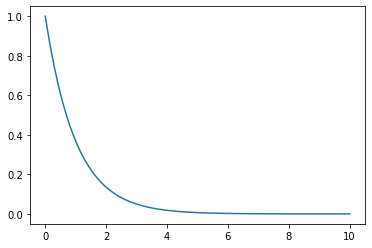

In [0]:
# Pr(x > X) : 도착까지 대기시간이 x를 초과할 확률 (x 이후의 면적)

import numpy as np
import matplotlib.pyplot as plt

lamda = 1
x = np.linspace(0, 10, 100)
pdf = (1/lamda) * np.exp(-x/lamda)

plt.plot(x, pdf)
plt.show()

In [0]:
# x는 오픈 시간 후, 랜덤하게 고객이 도착하는 시간을 의미한다.
np.random.seed(seed=1)
x = np.random.exponential(1, 10)
print('xtime: ', x) # 손님 간 시간 간격
print(np.mean(x), np.std(x))

endTime = np.cumsum(x)
print('endTime: ', endTime) # 고객이 도착한 시간

xtime:  [5.39605837e-01 1.27412525e+00 1.14381359e-04 3.60012755e-01
 1.58709595e-01 9.68838717e-02 2.06114634e-01 4.23976482e-01
 5.05452542e-01 7.73959775e-01]
0.43389551257941206 0.35676829778886443
endTime:  [0.53960584 1.81373109 1.81384547 2.17385823 2.33256782 2.42945169
 2.63556633 3.05954281 3.56499535 4.33895513]


In [0]:
# 난수 : 난해한 수, 어려운 수, 규칙성이 없는 수
# 0 ~ 1 사이의 난수 만들기
# 컴퓨터의 난수 생성 방법 : 현재 시간을 이용하여 정수 하나를 만들어냄. 그 정수를 가장 큰 정수값으로 나눈 나머지를 리턴
# 지수분포를 따르는 난수

import numpy as np
x = np.random.uniform()
print(x)

0.4191945144032948


 * 참고: 지수분포 난수를 어떻게 만들 수 있는가?(Inverse Transform Sampling)

    * 모든 난수는 U(0,1) 로 부터 만들 수 있다.
    * $ X \sim F(x) $ 일때 , $ X = F^{-1}(U), U \sim U(0,1) $ 의 CDF는 F(x)가 성립한다.

$ \hspace{33pt} f(x) = \frac {1}{\lambda} exp(-\frac {x}{\lambda}) $

$$ F(x) = \int_0^x f(x) dx =  \int_0^x \frac {1}{\lambda} exp(-\frac {x}{\lambda}) dx = 1-exp(-\frac {x}{\lambda})\quad \text{적분은 미분의 반대}$$  

$$ U = 1-exp(-\frac {x}{\lambda}) $$
$$ U = exp(-\frac {x}{\lambda}) $$
$$ ln \ U = -\frac {x}{\lambda} $$

$$ \therefore X = - \lambda \cdot  ln \ U$$
<center><img src="https://drive.google.com/uc?id=1EqPQBYTEyZ5udKYJK4FafgG3wZSmNX0D" width="300" height="200"></center>



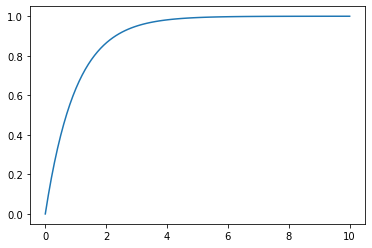

In [0]:
import matplotlib.pyplot as plt

lamda = 1
x = np.linspace(0, 10, 100)
cdf = 1 - np.exp(-x/lamda)

plt.plot(x, cdf)
plt.show()

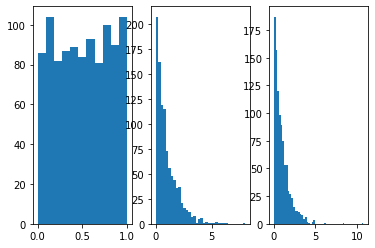

In [13]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 3)

u = np.random.random(1000)
lamda = 1
x = -lamda * np.log(u) # 난수들을 지수 분포 난수로 만들어줄 수 있다.

e = np.random.exponential(size=1000)

ax[0].hist(u, bins='auto') # 일반 난수
ax[1].hist(x, bins='auto') # 지수 분포 난수 식 이용
ax[2].hist(e, bins='auto') # numpy random exponential
plt.show()

* 손님이 도착해서 커피를 주문하고 받는 시간을 확률변수 Y라고 하고 $Y \sim N(1, 0.2^2)$ 이라고 가정하자.  
* 그러면 손님이 커피를 가지고 나가는 시간은 아래와 같이 모의실험 할 수 있다.  

In [0]:
# 나간 시간 = 도착 시간 + cooking Time

np.random.seed(seed=1)
cookTime = np.random.normal(1, 0.2, 10)
cookTime = np.where(cookTime < 0, 0, cookTime)
cookTime

array([1.32486907, 0.87764872, 0.89436565, 0.78540628, 1.17308153,
       0.53969226, 1.34896235, 0.84775862, 1.06380782, 0.95012592])

In [0]:
np.mean(cookTime), np.std(cookTime)

(0.9805718218387799, 0.23817971041278044)

* 아래는 큐 대기인원을 계산한 예다. 이 예에서는 CookTime = 1분으로 고정했다.

<center><img src="https://drive.google.com/uc?id=1BRqUT8geULTRVMw6uYsId7B3kvFvLoj4" width="400" height="250"></center>

<font color='red'>H.W # 6: 위의 예처럼 오전 8시에 시작해서 오후 10시에 종료하는 커피가게 큐 대기인원의 분포를 모의실험하시오.</font>
* 큐에 최대 인원은 몇 명인가?
* 시간대 별로 도착시간 분포를 조정해 보세요 즉, 점심시간에는 사람이 붐비게 해 봅시다.
* 주문을 두명이 받는다면 어떻게 되는가?

Hint>
* Cust Class를 만들고, arriveTime, orderTime, outTime을 관리한다.
* Shop Class를 만들고, custQueue를 만든다.
  * getSize method: 큐 크기를 구한다.
  * entCust method: 큐에 cust를 넣는다.
  * outCust method: 큐에서 cust를 내보낸다.(조건은 현재 시간보다 outTime이 작은 cust는 deQueue 한다.)
  * getLast method: 큐에 가장 최근에 들어간 고객을 리턴한다.
  
* main 프로그램
  * 커피가게를 만든다.
  * curTime = 0 (8시) 부터 14\*60 분 보다 작을 때까지 아래를 반복한다.
  * 고객을 생성한다.  (도착시간 정의)
  * 큐에 고객이 없으면 현재 고객의 orderTime = arriveTime이고 고객이 있으면 최근에 들어간 고객의 outTime 이다.
  *  outTime = orderTime + cookTime
  * 고객을 큐에 넣는다.
  * curTime을 현재 고객의 arriveTime으로 한다.
  * 큐에서 curTime 보다 outTime이 과거인 고객은 deQueue한다.

In [9]:
class Cust:
    def __init__(self, arriveTime=None):
        self.arriveTime = arriveTime
        self.orderTime = 0
        self.outTime = 0
        
class Shop:
    def __init__(self):
        self.custQueue = []
    
    def getSize(self):
        return len(self.custQueue)

    def entCust(self, cust):
        self.custQueue.append(cust)

    def outCust(self):
        del self.custQueue[0]

    def getLast(self):
        return self.custQueue[-1]

shop = Shop()
shop.entCust('영효')
shop.entCust('중민')
shop.entCust('태호')
shop.entCust('채연')
shop.getLast()

'채연'

In [30]:
import numpy as np
np.random.seed(seed=0)

shop = Shop()
curTime = 0
maxCust = 0
cookTime = 1
while curTime < (60 * 14): # 0800 ~ 2200 (60 * 14 == 840)
    arrive = curTime + np.random.exponential() # 도착시간 랜덤 정의
    cust = Cust(arrive)
    # 큐에 따른 고객의 시간 정의
    if shop.getSize() == 0:
        cust.orderTime = cust.arriveTime
    else:
        cust.orderTime = shop.getLast().outTime
    cust.outTime = cust.orderTime + cookTime
    shop.entCust(cust)
    
    curTime = cust.arriveTime
    hour = curTime // 60 + 8
    min = curTime % 60
    
    for cust in shop.custQueue:
        if cust.outTime < curTime:
            shop.outCust()
    
    if maxCust < shop.getSize():
        maxCust = shop.getSize()
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 최대 인원은: {:>5}명'.format(hour, min, maxCust))
print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 문을 닫습니다.'.format(hour, min))

현재 시각:   8.0시   0.8분 	 최대 인원은:     1명
현재 시각:   8.0시   3.8분 	 최대 인원은:     2명
현재 시각:   9.0시   2.3분 	 최대 인원은:     3명
현재 시각:   9.0시   2.5분 	 최대 인원은:     4명
현재 시각:   9.0시   4.8분 	 최대 인원은:     5명
현재 시각:   9.0시  21.4분 	 최대 인원은:     6명
현재 시각:   9.0시  22.3분 	 최대 인원은:     7명
현재 시각:   9.0시  29.2분 	 최대 인원은:     8명
현재 시각:   9.0시  30.1분 	 최대 인원은:     9명
현재 시각:   9.0시  33.3분 	 최대 인원은:    10명
현재 시각:  11.0시  59.6분 	 최대 인원은:    11명
현재 시각:  12.0시   0.7분 	 최대 인원은:    12명
현재 시각:  13.0시  36.2분 	 최대 인원은:    13명
현재 시각:  13.0시  45.0분 	 최대 인원은:    14명
현재 시각:  13.0시  45.5분 	 최대 인원은:    15명
현재 시각:  14.0시  44.7분 	 최대 인원은:    16명
현재 시각:  22.0시   0.0분 	 문을 닫습니다.


In [34]:
# 점심시간에 사람이 붐비도록 (1200 ~ 1300)

import numpy as np
np.random.seed(seed=0)

shop = Shop()
curTime = 0
maxCust = 0
cookTime = 1
while curTime < (60 * 14): # 0800 ~ 2200 (60 * 14 == 840)
    # 점심시간 난수 설정
    if curTime >= 60 * 4 and curTime < 60 * 5: # 1200 ~ 1300 시간대 조절
        arrive = curTime + np.random.exponential(scale=0.7) # scale: lambda 값 조절을 통한 정해진 시간대의 난수 조절
    else:
        arrive = curTime + np.random.exponential() # 도착시간 랜덤 정의
    cust = Cust(arrive)
    # 큐에 따른 고객의 시간 정의
    if shop.getSize() == 0:
        cust.orderTime = cust.arriveTime
    else:
        cust.orderTime = shop.getLast().outTime
    cust.outTime = cust.orderTime + cookTime
    shop.entCust(cust)
    
    curTime = cust.arriveTime
    hour = curTime // 60 + 8
    min = curTime % 60
    
    for cust in shop.custQueue:
        if cust.outTime < curTime:
            shop.outCust()
    
    if maxCust < shop.getSize():
        maxCust = shop.getSize()
        
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 최대 인원은: {:>5}명'.format(hour, min, maxCust))
print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 문을 닫습니다.'.format(hour, min))

현재 시각:   8.0시   0.8분 	 최대 인원은:     1명
현재 시각:   8.0시   3.8분 	 최대 인원은:     2명
현재 시각:   9.0시   2.3분 	 최대 인원은:     3명
현재 시각:   9.0시   2.5분 	 최대 인원은:     4명
현재 시각:   9.0시   4.8분 	 최대 인원은:     5명
현재 시각:   9.0시  21.4분 	 최대 인원은:     6명
현재 시각:   9.0시  22.3분 	 최대 인원은:     7명
현재 시각:   9.0시  29.2분 	 최대 인원은:     8명
현재 시각:   9.0시  30.1분 	 최대 인원은:     9명
현재 시각:   9.0시  33.3분 	 최대 인원은:    10명
현재 시각:  11.0시  59.6분 	 최대 인원은:    11명
현재 시각:  12.0시   0.6분 	 최대 인원은:    12명
현재 시각:  12.0시  10.2분 	 최대 인원은:    13명
현재 시각:  12.0시  10.2분 	 최대 인원은:    14명
현재 시각:  12.0시  14.8분 	 최대 인원은:    15명
현재 시각:  12.0시  15.3분 	 최대 인원은:    16명
현재 시각:  12.0시  38.4분 	 최대 인원은:    17명
현재 시각:  12.0시  39.1분 	 최대 인원은:    18명
현재 시각:  12.0시  39.1분 	 최대 인원은:    19명
현재 시각:  12.0시  49.1분 	 최대 인원은:    20명
현재 시각:  12.0시  50.0분 	 최대 인원은:    21명
현재 시각:  12.0시  51.1분 	 최대 인원은:    22명
현재 시각:  12.0시  51.2분 	 최대 인원은:    23명
현재 시각:  12.0시  51.2분 	 최대 인원은:    24명
현재 시각:  12.0시  52.2분 	 최대 인원은:    25명
현재 시각:  12.0시  52.6분 	 최대 인원은:    26명
현재 시각:  12.0

In [55]:
# 주문을 두명이서 받을 때 (매장 두군데에서 손님을 받는다고 생각하자)

import numpy as np
np.random.seed(seed=0)

# 큐를 2개 생성
shop1 = Shop()
shop2 = Shop()

curTime = 0
maxCust = 0
cookTime = 1
while curTime < (60 * 14): # 0800 ~ 2200 (60 * 14 == 840)
    arrive = curTime + np.random.exponential() # 도착시간 랜덤 정의
    cust = Cust(arrive)
    # 큐에 따른 고객의 시간 정의
    if shop1.getSize() == 0: # shop1에 손님이 없으면 우선적으로 손님을 받는다.
        cust.orderTime = cust.arriveTime
        cust.outTime = cust.orderTime + cookTime
        shop1.entCust(cust)
    elif shop1.getSize() != 0 and shop2.getSize() == 0: # shop1에 손님이 있고 shop2에 없을 경우 shop2로 보낸다.
        cust.orderTime = cust.arriveTime
        cust.outTime = cust.orderTime + cookTime
        shop2.entCust(cust)
    else: # shop1과 shop2에 모두 손님이 있는 경우 각 shop 마다 마지막 손님의 outTime을 계산하고 작은 쪽으로 손님을 보낸다.
        if shop1.getLast().outTime < shop2.getLast().outTime:
            cust.orderTime = shop1.getLast().outTime
            cust.outTime = cust.orderTime + cookTime
            shop1.entCust(cust)
        else:
            cust.orderTime = shop2.getLast().outTime
            cust.outTime = cust.orderTime + cookTime
            shop2.entCust(cust)
    
    curTime = cust.arriveTime
    hour = curTime // 60 + 8
    min = curTime % 60
    
    for cust1 in shop1.custQueue:
        if cust1.outTime < curTime:
            shop1.outCust()

    for cust2 in shop2.custQueue:
        if cust2.outTime < curTime:
            shop2.outCust()
    
    if maxCust < shop1.getSize():
        maxCust = shop1.getSize()
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t shop1에서 최대 인원은: {:>5}명'.format(hour, min, maxCust))
        print('\t\t\t\t shop2에서 현재 인원은: {:>5}명'.format(shop2.getSize()))
        print('\t')
    elif maxCust < shop2.getSize():
        maxCust = shop2.getSize()
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t shop2에서 최대 인원은: {:>5}명'.format(hour, min, maxCust))
        print('\t\t\t\t shop1에서 현재 인원은: {:>5}명'.format(shop1.getSize()))
        print('\t')
print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 문을 닫습니다.'.format(hour, min))

현재 시각:   8.0시   0.8분 	 shop1에서 최대 인원은:     1명
				 shop2에서 현재 인원은:     0명
	
현재 시각:   8.0시  17.9분 	 shop1에서 최대 인원은:     2명
				 shop2에서 현재 인원은:     1명
	
현재 시각:   9.0시  18.0분 	 shop1에서 최대 인원은:     3명
				 shop2에서 현재 인원은:     2명
	
현재 시각:   9.0시  19.1분 	 shop1에서 최대 인원은:     4명
				 shop2에서 현재 인원은:     3명
	
현재 시각:  22.0시   0.0분 	 문을 닫습니다.


In [64]:
# 주문을 두명이서 받을 때 (매장 두군데에서 손님을 받는다고 생각하자)
# 점심시간 (1200 ~ 1300)까지 생각

import numpy as np
np.random.seed(seed=0)

# 큐를 2개 생성
shop1 = Shop()
shop2 = Shop()

curTime = 0
maxCust = 0
cookTime = 1
while curTime < (60 * 14): # 0800 ~ 2200 (60 * 14 == 840)
    # 점심시간 난수 설정
    if curTime >= 60 * 4 and curTime < 60 * 5: # 1200 ~ 1300 시간대 조절
        arrive = curTime + np.random.exponential(scale=0.7) # scale: lambda 값 조절을 통한 정해진 시간대의 난수 조절
    else:
        arrive = curTime + np.random.exponential() # 도착시간 랜덤 정의

    cust = Cust(arrive)
    # 큐에 따른 고객의 시간 정의
    if shop1.getSize() == 0: # shop1에 손님이 없으면 우선적으로 손님을 받는다.
        cust.orderTime = cust.arriveTime
        cust.outTime = cust.orderTime + cookTime
        shop1.entCust(cust)
    elif shop1.getSize() != 0 and shop2.getSize() == 0: # shop1에 손님이 있고 shop2에 없을 경우 shop2로 보낸다.
        cust.orderTime = cust.arriveTime
        cust.outTime = cust.orderTime + cookTime
        shop2.entCust(cust)
    else: # shop1과 shop2에 모두 손님이 있는 경우 각 shop 마다 마지막 손님의 outTime을 계산하고 작은 쪽으로 손님을 보낸다.
        if shop1.getLast().outTime < shop2.getLast().outTime:
            cust.orderTime = shop1.getLast().outTime
            cust.outTime = cust.orderTime + cookTime
            shop1.entCust(cust)
        else:
            cust.orderTime = shop2.getLast().outTime
            cust.outTime = cust.orderTime + cookTime
            shop2.entCust(cust)
    
    curTime = cust.arriveTime
    hour = curTime // 60 + 8
    min = curTime % 60
    
    for cust1 in shop1.custQueue:
        if cust1.outTime < curTime:
            shop1.outCust()

    for cust2 in shop2.custQueue:
        if cust2.outTime < curTime:
            shop2.outCust()
    
    if maxCust < shop1.getSize():
        maxCust = shop1.getSize()
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t shop1에서 최대 인원은: {:>5}명'.format(hour, min, maxCust))
        print('\t\t\t\t shop2에서 현재 인원은: {:>5}명'.format(shop2.getSize()))
        print('\t')
    elif maxCust < shop2.getSize():
        maxCust = shop2.getSize()
        print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t shop2에서 최대 인원은: {:>5}명'.format(hour, min, maxCust))
        print('\t\t\t\t shop1에서 현재 인원은: {:>5}명'.format(shop1.getSize()))
        print('\t')
print('현재 시각: {:>5.1f}시 {:>5.1f}분 \t 문을 닫습니다.'.format(hour, min))

현재 시각:   8.0시   0.8분 	 shop1에서 최대 인원은:     1명
				 shop2에서 현재 인원은:     0명
	
현재 시각:   8.0시  17.9분 	 shop1에서 최대 인원은:     2명
				 shop2에서 현재 인원은:     1명
	
현재 시각:   9.0시  18.0분 	 shop1에서 최대 인원은:     3명
				 shop2에서 현재 인원은:     2명
	
현재 시각:   9.0시  19.1분 	 shop1에서 최대 인원은:     4명
				 shop2에서 현재 인원은:     3명
	
현재 시각:  12.0시  56.3분 	 shop1에서 최대 인원은:     5명
				 shop2에서 현재 인원은:     4명
	
현재 시각:  22.0시   0.0분 	 문을 닫습니다.
